In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind

In [2]:
def process_data(path:str, norm : bool = True, print_data = False):
    #read data
    data_list = []
    data_path = path
    with open(data_path) as f:
        lines = f.read().split("\n")
        
    if norm:       
        [data_list.append(line.split(","))for line in lines[1:]]
        d = {'Age':[int(participant[0]) for participant in data_list],'Condition':[int(participant[1]) for participant in data_list],'Time_1':[(float(participant[2])/(float(participant[2]) + float(participant[3]))) for participant in data_list],'Time_2':[(float(participant[3])/(float(participant[2]) + float(participant[3]))) for participant in data_list]}
        df = pd.DataFrame(data=d)
    else:
        
        [data_list.append(line.split(","))for line in lines[1:]]
        d = {'Age':[int(participant[0]) for participant in data_list],'Condition':[int(participant[1]) for participant in data_list],'Time_1':[int(participant[2]) for participant in data_list],'Time_2':[int(participant[3]) for participant in data_list]}
        df = pd.DataFrame(data=d)
    print("After Text to DataFrame:\n ", df) if print_data else None
    return df
    

In [3]:
#Calculate z-score of Time columns and remove outliers
def calc_z(data:pd.DataFrame, print_data = False):
    copy_data = []
    while(len(data) != len(copy_data)):
        copy_data = data
        data = data[(np.abs(stats.zscore(data["Time_1"])) < 3)]
        data = data[(np.abs(stats.zscore(data["Time_2"])) < 3)]
        
    print("\nAfter calc_z:\n ", data)
        
    return data
        

In [4]:
def group_con(data:pd.DataFrame):    
    grouped = data.groupby(data.Condition)
    con1 = grouped.get_group(1)
    con2 = grouped.get_group(2)
    return con1,con2

In [5]:
def process_txt(data_path: str, norm:bool = True, print_data = False):
    df = process_data(data_path, norm, print_data)
    df = calc_z(df, print_data)
    return group_con(df)

In [6]:
#read data
data_path = "data/data.txt"
con1, con2 = process_txt(data_path, print_data = True)
#print(con2)
#print(con1, "\n" ,con2)
print(con1.median())
print(con2.median())

After Text to DataFrame:
      Age  Condition    Time_1    Time_2
0    25          1  0.521281  0.478719
1    32          2  0.834138  0.165862
2    20          1  0.527318  0.472682
3    49          1  0.719922  0.280078
4    29          2  0.654767  0.345233
5    20          1  0.661252  0.338748
6    23          1  0.709825  0.290175
7    20          1  0.545759  0.454241
8    21          2  0.800806  0.199194
9    21          2  0.515367  0.484633
10   21          1  0.156988  0.843012
11   47          1  0.834034  0.165966
12   48          1  0.888836  0.111164
13   23          1  0.858762  0.141238
14   54          1  0.741341  0.258659
15   30          2  0.695285  0.304715
16   53          2  0.616138  0.383862
17   25          2  0.687870  0.312130
18   24          2  0.739929  0.260071
19   26          1  0.778090  0.221910
20   21          2  0.721785  0.278215
21   23          1  0.861188  0.138812

After calc_z:
      Age  Condition    Time_1    Time_2
0    25          1  

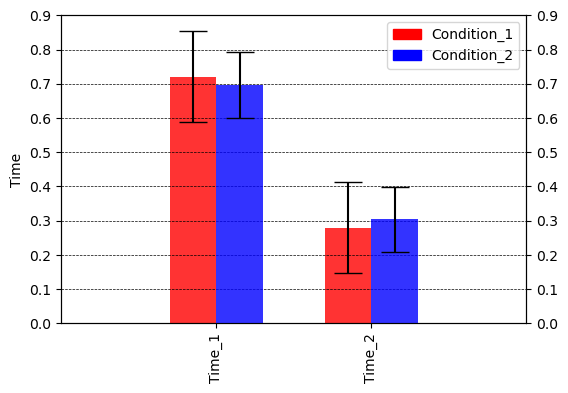

In [7]:
red_patch = mpatches.Patch(color='red', label='Condition_1')
blue_patch = mpatches.Patch(color='blue', label='Condition_2')

fig = plt.figure(figsize = (6,4)) # Create matplotlib figure
ax1 = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax1.twinx() # Create another axes that shares the same x-axis as ax.


width = 0.3

ax1.set_ylim(0,0.9)
ax2.set_ylim(0,0.9)

con1.mean()['Time_1':'Time_2'].plot(kind='bar', yerr = con1.std()['Time_1':'Time_2'], alpha=0.8, ecolor='black', capsize = 10,color='red', ax=ax1, width=width, position=1)
con2.mean()['Time_1':'Time_2'].plot(kind='bar', yerr = con2.std()['Time_1':'Time_2'], alpha=0.8, ecolor='black', capsize = 10,color='blue', ax=ax2, width=width, position=0)

ax1.yaxis.grid(True,color='black', linestyle='--', linewidth=0.5)

ax1.set_ylabel('Time')


ax2.legend(handles=[red_patch,blue_patch])
ax1.set_xlim(-1,2)

plt.savefig('fig/barplot_mean_normalized.png')
plt.show()

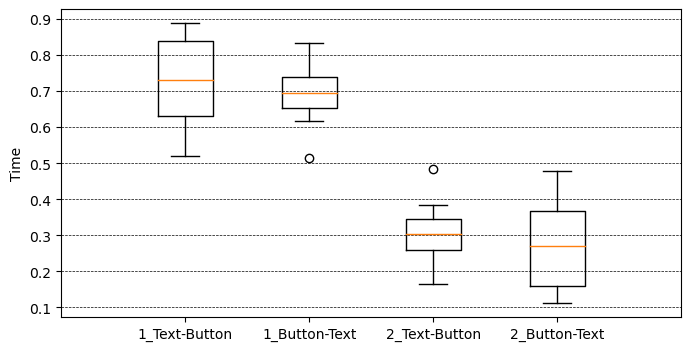

In [8]:
fig = plt.figure(figsize = (8,4)) # Create matplotlib figure
ax1 = fig.add_subplot(111) # Create matplotlib axes

width = 0.3

data = [con1['Time_1'],con2['Time_1'],con2['Time_2'],con1['Time_2']]
labels = ["1_Text-Button","1_Button-Text","2_Text-Button","2_Button-Text"]

ax1.boxplot(data, labels = labels)

ax1.yaxis.grid(True,color='black', linestyle='--', linewidth=0.5)

ax1.set_ylabel('Time')

ax1.set_xlim(0,5)

plt.savefig('fig/boxplot_normalized.png')
plt.show()

In [9]:
t_1 = ttest_ind(con1['Time_1'],con2['Time_1'])
t_2 = ttest_ind(con1['Time_2'],con2['Time_2'])
print("T-Testing between condtions:\nTime_1:\n",t_1,"\n\nTime_2:\n",t_2)

T-Testing between condtions:
Time_1:
 Ttest_indResult(statistic=0.46552696866711724, pvalue=0.6468459162107666) 

Time_2:
 Ttest_indResult(statistic=-0.4655269686671162, pvalue=0.6468459162107674)


In [10]:
#read data
data_path = "data/data.txt"
con1, con2 = process_txt(data_path, norm = False, print_data = True)
#print(con1, "\n" ,con2)
print(con1.median())
print(con2.median())

After Text to DataFrame:
      Age  Condition  Time_1  Time_2
0    25          1    1286    1181
1    32          2    6045    1202
2    20          1    4459    3997
3    49          1    9562    3720
4    29          2    6236    3288
5    20          1    9077    4650
6    23          1    7615    3113
7    20          1    3751    3122
8    21          2    9934    2471
9    21          2   22537   21193
10   21          1   13043   70040
11   47          1    8930    1777
12   48          1   15064    1884
13   23          1    8938    1470
14   54          1    9461    3301
15   30          2   14893    6527
16   53          2    9369    5837
17   25          2   13809    6266
18   24          2    7733    2718
19   26          1    6101    1740
20   21          2    6696    2581
21   23          1    9945    1603

After calc_z:
      Age  Condition  Time_1  Time_2
0    25          1    1286    1181
1    32          2    6045    1202
2    20          1    4459    3997
3    49    

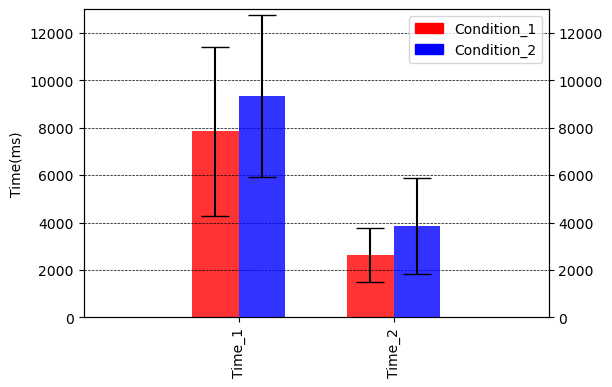

In [11]:
red_patch = mpatches.Patch(color='red', label='Condition_1')
blue_patch = mpatches.Patch(color='blue', label='Condition_2')

fig = plt.figure(figsize = (6,4)) # Create matplotlib figure
ax1 = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax1.twinx() # Create another axes that shares the same x-axis as ax.


width = 0.3

ax1.set_ylim(0,13000)
ax2.set_ylim(0,13000)

con1.mean()['Time_1':'Time_2'].plot(kind='bar', yerr = con1.std()['Time_1':'Time_2'], alpha=0.8, ecolor='black', capsize = 10,color='red', ax=ax1, width=width, position=1)
con2.mean()['Time_1':'Time_2'].plot(kind='bar', yerr = con2.std()['Time_1':'Time_2'], alpha=0.8, ecolor='black', capsize = 10,color='blue', ax=ax2, width=width, position=0)

ax1.yaxis.grid(True,color='black', linestyle='--', linewidth=0.5)

ax1.set_ylabel('Time(ms)')


ax2.legend(handles=[red_patch,blue_patch])
ax1.set_xlim(-1,2)

plt.savefig('fig/barplot_mean_total.png')
plt.show()

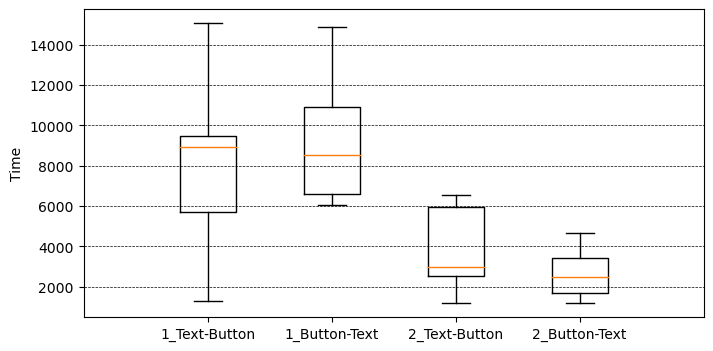

In [12]:
fig = plt.figure(figsize = (8,4)) # Create matplotlib figure
ax1 = fig.add_subplot(111) # Create matplotlib axes

width = 0.3

data = [con1['Time_1'],con2['Time_1'],con2['Time_2'],con1['Time_2']]
labels = ["1_Text-Button","1_Button-Text","2_Text-Button","2_Button-Text"]

ax1.boxplot(data, labels = labels)

ax1.yaxis.grid(True,color='black', linestyle='--', linewidth=0.5)

ax1.set_ylabel('Time')

ax1.set_xlim(0,5)

plt.savefig('fig/boxplot_total.png')
plt.show()

In [13]:
t_1 = ttest_ind(con1['Time_1'],con2['Time_1'])
t_2 = ttest_ind(con2['Time_2'],con1['Time_2'])
print("T-Testing between condtions:\nTime_1:\n",t_1,"\n\nTime_2:\n",t_2)

T-Testing between condtions:
Time_1:
 Ttest_indResult(statistic=-0.9306831480310277, pvalue=0.36433254196224274) 

Time_2:
 Ttest_indResult(statistic=1.7312837408506958, pvalue=0.10050526230324265)
